# 고급회귀분석 실습
> chapter 3, chapter 4

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: [Advanced Regression Analysis]

In [1]:
# setwd('C:/R-Project/DAT/Regression/')

In [2]:
library(ggplot2)

## Data

In [3]:
dt <- data.frame(x = c(4,8,9,8,8,12,6,10,6,9),
                 y = c(9,20,22,15,17,30,18,25,10,20))
dt

x,y
<dbl>,<dbl>
4,9
8,20
9,22
8,15
8,17
12,30
6,18
10,25
6,10


correlation check

In [4]:
cor(dt$x, dt$y)

[1] 0.9218123

산점도 확인

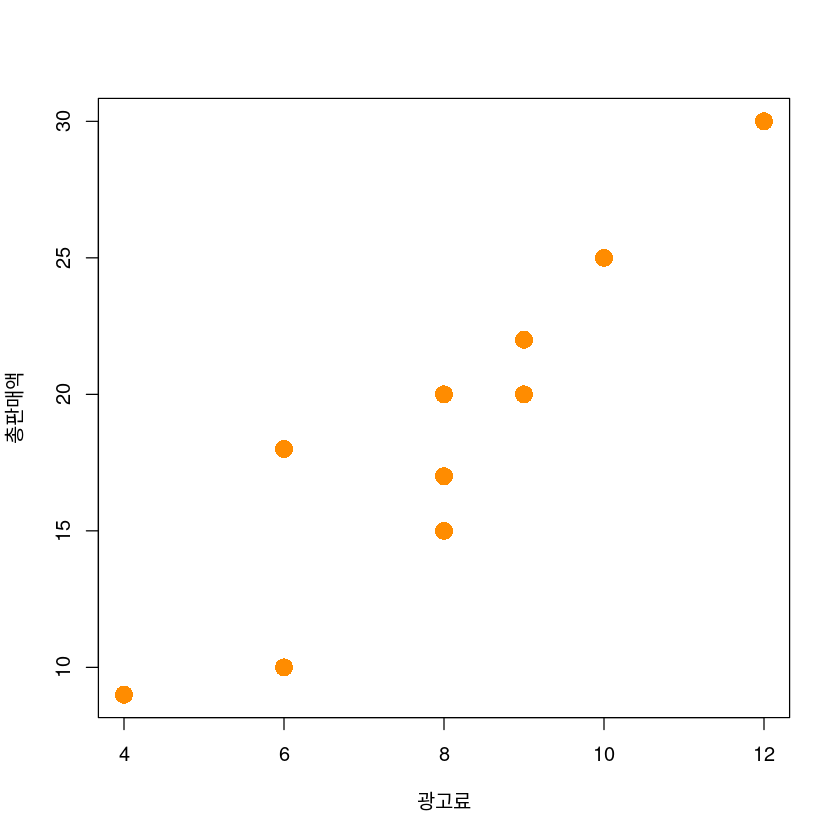

In [5]:
plot(y~x, 
     data = dt,
     xlab = "광고료",
     ylab = "총판매액",
     pch  = 16,
     cex  = 2,
     col  = "darkorange")

- pch 점 모양
- cex 점 크기

- 양의상관관계 강하네,
- 우상향이네, 단순상관선형 적용해보면 되겠다.

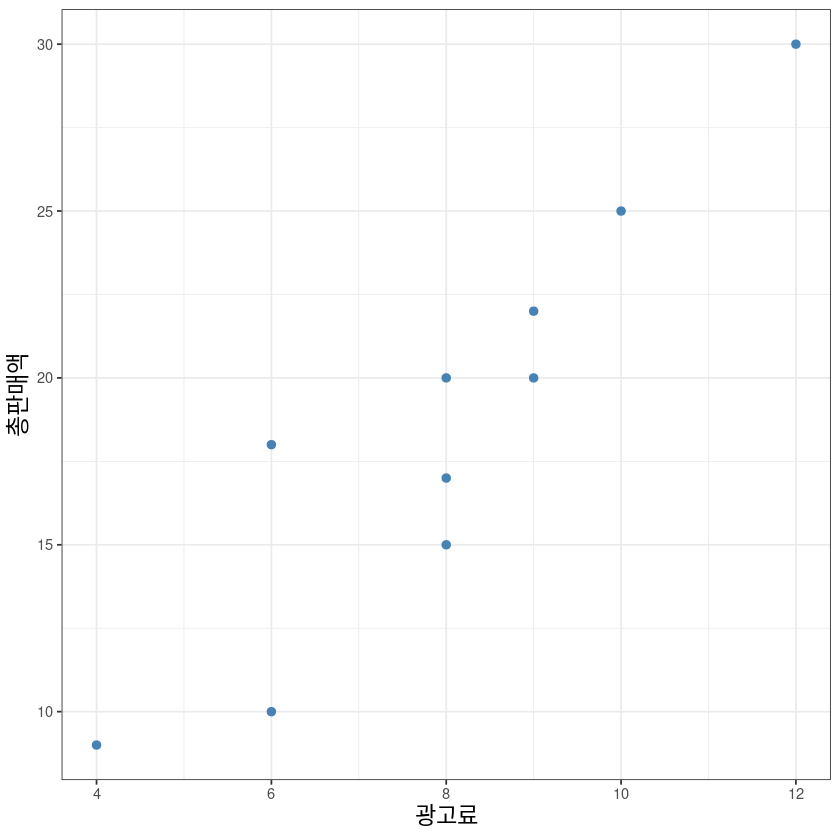

In [6]:
ggplot(dt, aes(x, y)) +
  geom_point(col='steelblue', lwd=2) +
  # geom_abline(intercept = co[1], slope = co[2], col='darkorange', lwd=1.2) +
  xlab("광고료")+ylab("총판매액")+
  # scale_x_continuous(breaks = seq(1,10))+
  theme_bw() +
  theme(axis.title = element_text(size = 14))

In [7]:
# 적합
### hat y = hat (E(y|X=x)) = hat beta_0 +hat beta_1 * x

#### H0 : beta0 =0 vs H1 : beta0 != 0
#### H0 : beta1 =0 vs H1 : beta1 != 0

모형 적합을 한다 yhat을 찾는다.
- 회귀분석을 한다. 평균 반응을 추정한다.

lm linear model 사용

In [8]:
## y = beta0 + beta1*x + epsilon
model1 <- lm(y ~ x, dt)
# lm(y ~ 0 + x, dt) beta0 없이 분석하고 싶을때
model1


Call:
lm(formula = y ~ x, data = dt)

Coefficients:
(Intercept)            x  
     -2.270        2.609  


설명변수 x 하나일때

- beta0hat = -2.270 
- beta1hat = 2.609

In [9]:
summary(model1) 


Call:
lm(formula = y ~ x, data = dt)

Residuals:
   Min     1Q Median     3Q    Max 
-3.600 -1.502  0.813  1.128  4.617 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.2696     3.2123  -0.707 0.499926    
x             2.6087     0.3878   6.726 0.000149 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.631 on 8 degrees of freedom
Multiple R-squared:  0.8497,	Adjusted R-squared:  0.831 
F-statistic: 45.24 on 1 and 8 DF,  p-value: 0.0001487


- 모형의 유의성 검정 자체(f검정)
- 개별 회귀계수에 대한 유의성검정(t검정)
- beta1은 유의하지 않다
- beta0는 유의하다
- f통계량은 45.24(msr/mse) p값 충분히 작아서 모형은 유의하다.
- y의 총 변동 중에 85%정도를 설명하고 있다.
- root mse(RMSE) = 2.631

In [10]:
6.726**2

[1] 45.23908

단순선형에서만 해당

0.000149도 같음

In [11]:
names(model1)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In [12]:
model1$residuals # 보고 싶은 변수 입력해봐~

1          2          3          4          5          6          7 
 0.8347826  1.4000000  0.7913043 -3.6000000 -1.6000000  0.9652174  4.6173913 
         8          9         10 
 1.1826087 -3.3826087 -1.2086957

In [13]:
model1$fitted.values  ##hat y
model1$coefficients

1         2         3         4         5         6         7         8 
 8.165217 18.600000 21.208696 18.600000 18.600000 29.034783 13.382609 23.817391 
        9        10 
13.382609 21.208696

(Intercept)           x 
  -2.269565    2.608696

In [14]:
anova(model1)  ## 회귀모형의 유의성 검정

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x,1,313.04348,313.043478,45.24034,0.0001486582
Residuals,8,55.35652,6.919565,NA,NA


- 설명변수의 개수가 x 자유도
- 잔차의 자유도는 n-2

In [15]:
a <- summary(model1)
ls(a)

[1] "adj.r.squared" "aliased"       "call"          "coefficients" 
 [5] "cov.unscaled"  "df"            "fstatistic"    "r.squared"    
 [9] "residuals"     "sigma"         "terms"

In [16]:
summary(model1)$coef   ## 회귀계수의 유의성 검정

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-2.269565,3.212348,-0.7065129,0.4999255886
x,2.608696,0.387847,6.7260939,0.0001486582


In [17]:
confint(model1, level = 0.95)  ##회귀계수의 신뢰구간
## beta +- t_alpha/2 (n-2) * se(beta)
qt(0.025, 8)
qt(0.975, 8)

,2.5 %,97.5 %
(Intercept),-9.677252,5.138122
x,1.714319,3.503073


[1] -2.306004

[1] 2.306004

- qt _ tquantile

In [18]:
## y = beta1*x + epsilon
model2 <- lm(y ~ 0 + x, dt)
summary(model2)


Call:
lm(formula = y ~ 0 + x, data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0641 -1.5882  0.2638  1.4818  3.9359 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
x   2.3440     0.0976   24.02  1.8e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.556 on 9 degrees of freedom
Multiple R-squared:  0.9846,	Adjusted R-squared:  0.9829 
F-statistic: 576.8 on 1 and 9 DF,  p-value: 1.798e-09


- intercept 없는 모습
- r squre가 두 번째가 높고,
- p값도 훨씬 유의하게 나옴

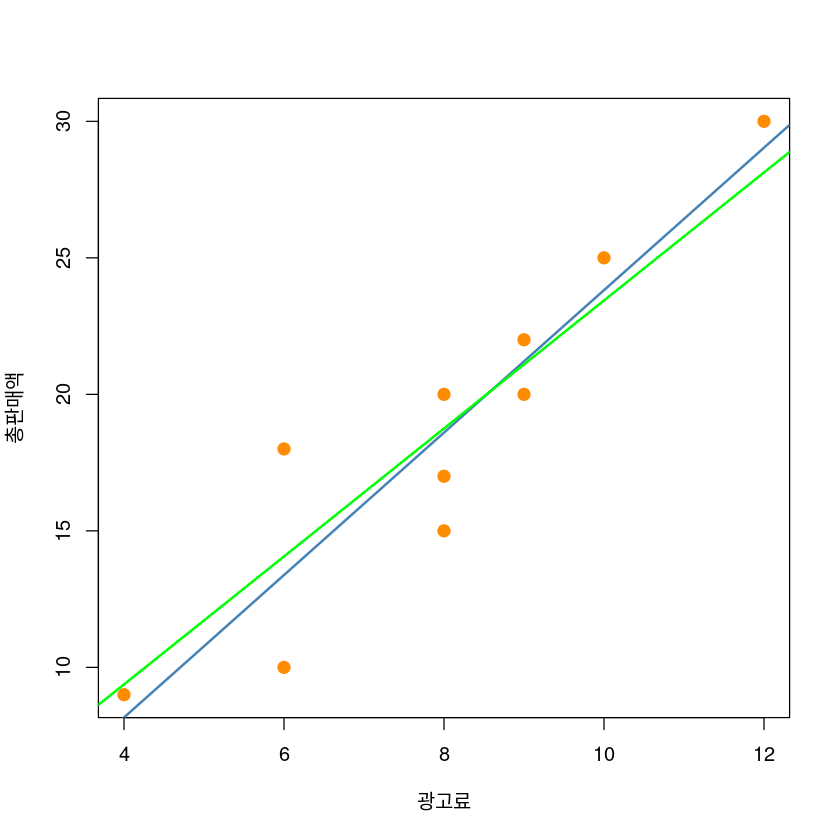

In [19]:
###########
plot(y~x, data = dt,
     xlab = "광고료",
     ylab = "총판매액",
     pch  = 20,
     cex  = 2,
     col  = "darkorange")
abline(model1, col='steelblue', lwd=2)
abline(model2, col='green', lwd=2)

model들이 기울기가 살짝씩 다르다

In [20]:
co <- coef(model1)

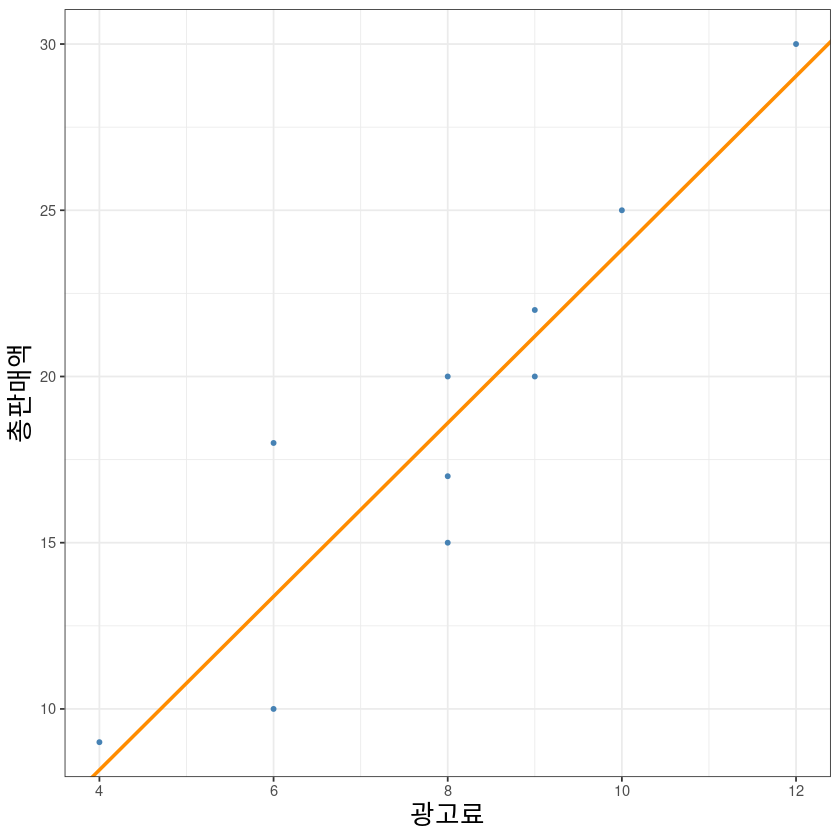

In [21]:
ggplot(dt, aes(x, y)) +
  geom_point(col='steelblue', lwd=1) +
  geom_abline(intercept = co[1], slope = co[2], col='darkorange', lwd=1) +
  xlab("광고료")+ylab("총판매액")+
  theme_bw()+
  theme(axis.title = element_text(size = 16))

In [22]:
######## LSE 구하기
# lm을 사용하지 않고 구할때

dt1 <- data.frame(
  i = 1:nrow(dt),
  x = dt$x,
  y = dt$y,
  x_barx = dt$x - mean(dt$x), # x - x평균
  y_bary = dt$y - mean(dt$y))  # y - y평균

In [23]:
dt1$x_barx2 <- dt1$x_barx^2 # x 편차의 제곱
dt1$y_bary2 <- dt1$y_bary^2 # y편차의 제곱
dt1$xy <-dt1$x_barx * dt1$y_bary

In [24]:
dt1

i,x,y,x_barx,y_bary,x_barx2,y_bary2,xy
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4,9,-4,-9.6,16,92.16,38.4
2,8,20,0,1.4,0,1.96,0.0
3,9,22,1,3.4,1,11.56,3.4
4,8,15,0,-3.6,0,12.96,0.0
5,8,17,0,-1.6,0,2.56,0.0
6,12,30,4,11.4,16,129.96,45.6
7,6,18,-2,-0.6,4,0.36,1.2
8,10,25,2,6.4,4,40.96,12.8
9,6,10,-2,-8.6,4,73.96,17.2


In [25]:
round(colSums(dt1),3)

i       x       y  x_barx  y_bary x_barx2 y_bary2      xy 
   55.0    80.0   186.0     0.0     0.0    46.0   368.4   120.0

In [26]:
### hat beta1 = S_xy / S_xx
##hat beta0 = bar y - hat beta_1 * bar x
beta1 <- as.numeric(colSums(dt1)[8]/colSums(dt1)[6])
beta0 <- mean(dt$y) - beta1 *  mean(dt$x)

In [27]:
cat("hat beta0 = ", beta0)
cat("hat beta1 = ", beta1)

hat beta0 =  -2.269565hat beta1 =  2.608696

### 평균반응, 개별 y 추정

구분할 수 있어야 한다

신뢰구간 달라진다.

In [50]:
## E(Y|x0) 평균반응
## y = E(Y|x0) + epsilon 개별 y 추정
# x0 = 4.5
new_dt <- data.frame(x = 4.5)

In [29]:
# hat y0 = hat beta0 + hat beta1 * 4.5

predict(model1, 
        newdata = new_dt,
        interval = c("confidence"), level = 0.95)

,fit,lwr,upr
1,9.469565,5.79826,13.14087


new_data=new_df 정의 안 하면 fitted value가 나온다.

`confidence`는 평균반응

In [30]:
predict(model1, newdata = new_dt, 
        interval = c("prediction"), level = 0.95)

,fit,lwr,upr
1,9.469565,2.379125,16.56001


`prediction`은 개별 y 추정

신뢰구간이 커진다. $\to$ 표준오차가 달라지기 때문

In [31]:
dt_pred <- data.frame(
  x = 1:12,
  predict(model1, 
          newdata=data.frame(x=1:12), 
          interval="confidence", level = 0.95))
dt_pred

,x,fit,lwr,upr
,<int>,<dbl>,<dbl>,<dbl>
1,1,0.3391304,-6.2087835,6.887044
2,2,2.9478261,-2.7509762,8.646628
3,3,5.5565217,0.6905854,10.422458
4,4,8.1652174,4.1058891,12.224546
5,5,10.7739130,7.4756140,14.072212
6,6,13.3826087,10.7597808,16.005437
7,7,15.9913043,13.8748223,18.107786
8,8,18.6000000,16.6817753,20.518225
9,9,21.2086957,19.0922136,23.325178


In [32]:
dt_pred2 <- as.data.frame(predict(model1, 
                                  newdata=data.frame(x=1:12), 
                                  interval="prediction", level = 0.95))
dt_pred2

,fit,lwr,upr
,<dbl>,<dbl>,<dbl>
1,0.3391304,-8.5867330,9.264994
2,2.9478261,-5.3751666,11.270819
3,5.5565217,-2.2199297,13.332973
4,8.1652174,0.8663128,15.464122
5,10.7739130,3.8692308,17.678595
6,13.3826087,6.7738957,19.991322
7,15.9913043,9.5667143,22.415894
8,18.6000000,12.2379683,24.962032
9,21.2086957,14.7841056,27.633286


In [33]:
names(dt_pred2)[2:3] <- c('plwr', 'pupr')

plot 같이 그리게 데이터 합치기

In [34]:
dt_pred3 <- cbind.data.frame(dt_pred, dt_pred2[,2:3])

In [35]:
barx <- mean(dt$x)
bary <- mean(dt$y)

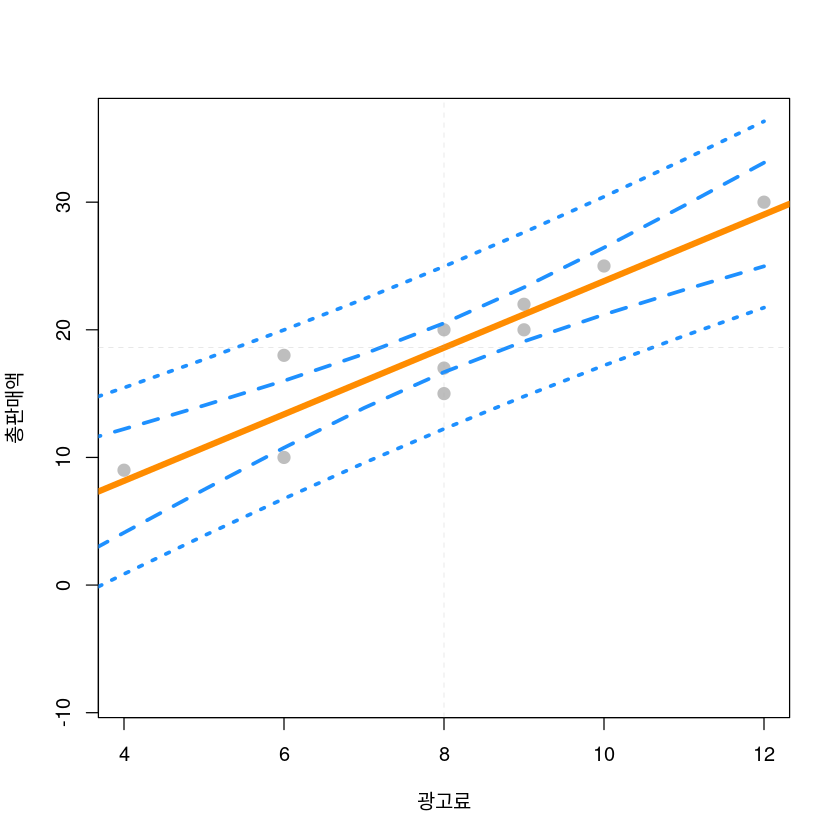

In [55]:
plot(y~x, data = dt,
     xlab = "광고료",
     ylab = "총판매액",
     pch  = 20,
     cex  = 2,
     col  = "grey",
     ylim = c(min(dt_pred3$plwr), max(dt_pred3$pupr)))
abline(model1, lwd = 5, col = "darkorange")
lines(dt_pred3$x, dt_pred3$lwr, col = "dodgerblue", lwd = 3, lty = 2)
lines(dt_pred3$x, dt_pred3$upr, col = "dodgerblue", lwd = 3, lty = 2)
lines(dt_pred3$x, dt_pred3$plwr, col = "dodgerblue", lwd = 3, lty = 3)
lines(dt_pred3$x, dt_pred3$pupr, col = "dodgerblue", lwd = 3, lty = 3)

abline(h=bary,v=barx, lty=2, lwd=0.2, col='dark grey')

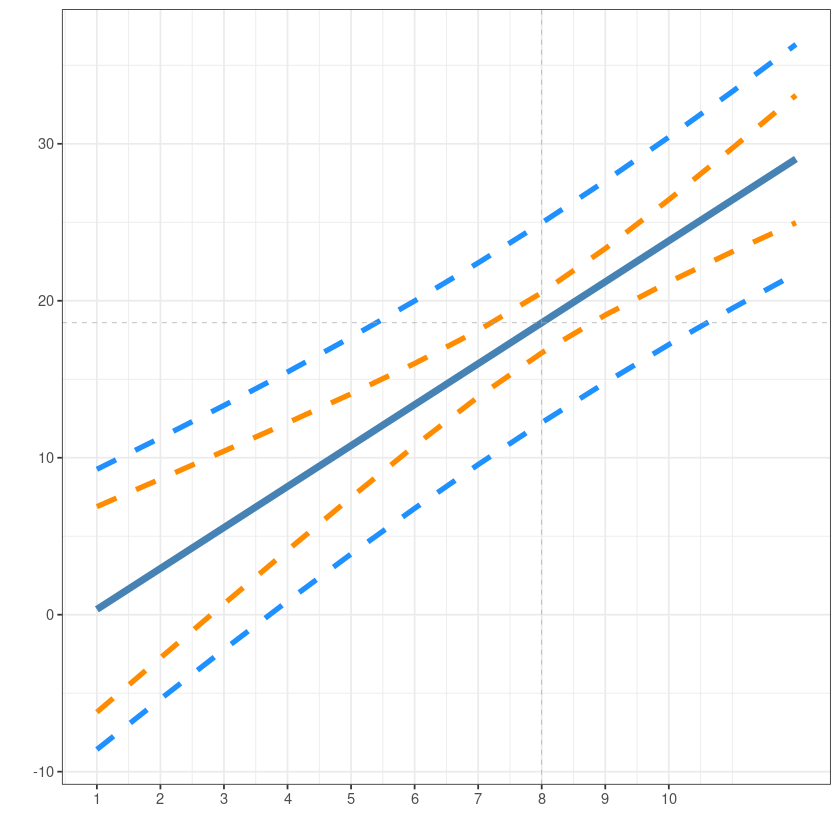

In [37]:
ggplot(dt_pred3, aes(x, fit)) +
  geom_line(col='steelblue', lwd=2) +
  xlab("")+ylab("")+
  scale_x_continuous(breaks = seq(1,10))+
  geom_line(aes(x, lwr), lty=2, lwd=1.5, col='darkorange') +
  geom_line(aes(x, upr), lty=2, lwd=1.5, col='darkorange') +
  geom_line(aes(x, plwr), lty=2, lwd=1.5, col='dodgerblue') +
  geom_line(aes(x, pupr), lty=2, lwd=1.5, col='dodgerblue') +
  geom_vline(xintercept = barx, lty=2, lwd=0.2, col='dark grey')+
  geom_hline(yintercept = bary, lty=2, lwd=0.2, col='dark grey')+
  theme_bw()

In [38]:
bb <- summary(model1)$sigma * ( 1 + 1/10 +(dt$x - 8)^2/46)
dt$ma95y <- model1$fitted + 2.306*bb
dt$mi95y <- model1$fitted - 2.306*bb

`geom_smooth()` using formula 'y ~ x'



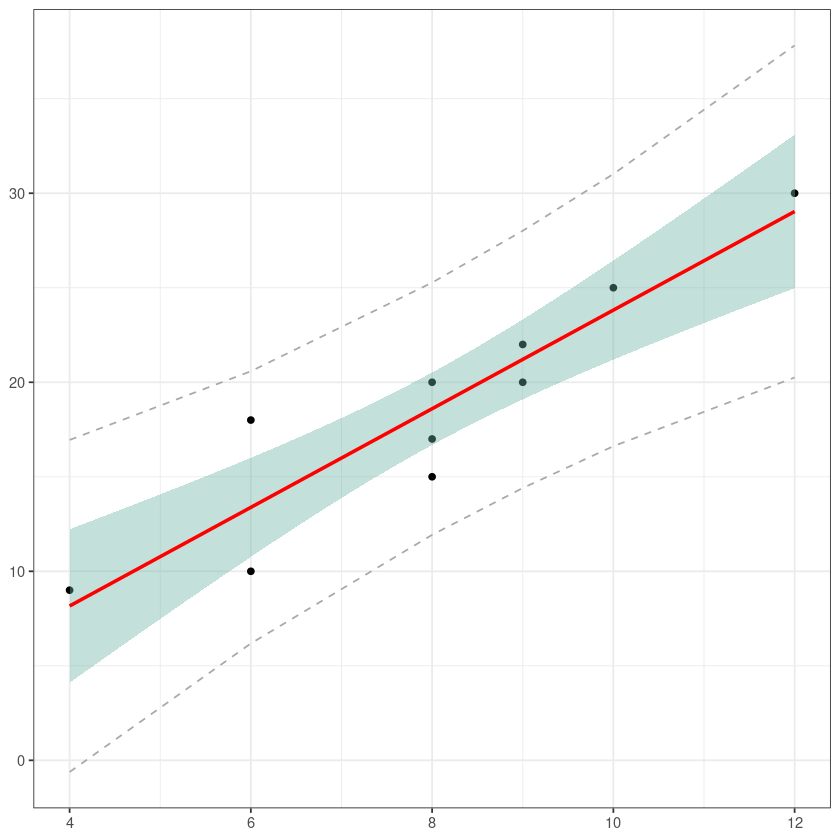

In [39]:
ggplot(dt, aes(x=x, y=y)) +
  geom_point() +
  geom_smooth(method=lm , color="red", fill="#69b3a2", se=TRUE) +
  geom_line(aes(x, mi95y), col = 'darkgrey', lty=2) +
  geom_line(aes(x, ma95y), col = 'darkgrey', lty=2) +
  theme_bw() +
  theme(axis.title = element_blank())

### 잔차분석

In [56]:
### epsilon : 선형성, 등분산성, 정규성, 독립성

In [41]:
dt
dt$yhat <- model1$fitted
# fitted.values(model1) # y에 대한 추정값 구하기
dt$resid <- model1$residuals
# resid(model1)

x,y,ma95y,mi95y
<dbl>,<dbl>,<dbl>,<dbl>
4,9,16.94766,-0.6172208
8,20,25.27254,11.9274568
9,22,28.01311,14.4042841
8,15,25.27254,11.9274568
8,17,25.27254,11.9274568
12,30,37.81722,20.2523444
6,18,20.58263,6.1825918
10,25,31.01741,16.6173744
6,10,20.58263,6.1825918


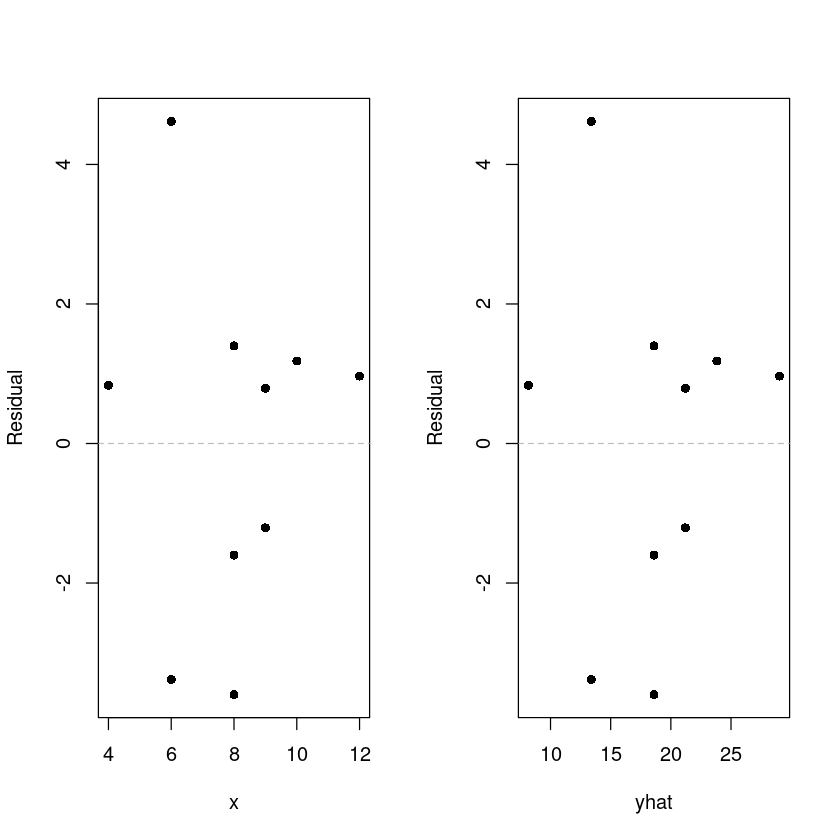

In [42]:
par(mfrow=c(1,2))
plot(resid ~ x, dt, pch=16, ylab = 'Residual')
abline(h=0, lty=2, col='grey')
plot(resid ~ yhat, dt, pch=16, ylab = 'Residual')
abline(h=0, lty=2, col='grey')
par(mfrow=c(1,1))

단순선형에서는 두 plot의 차이가 없다.

- 선형성 만족
- 등분산성 나름 만족
- 정규성 아웃라이어 있는 거 같은데..
- 독립성?

In [57]:
# 독립성검정 : DW test
library(lmtest)

In [58]:
## 
dwtest(model1, alternative = "two.sided")  #H0 : uncorrelated vs H1 : rho != 0
# dwtest(model1, alternative = "greater")  #H0 : uncorrelated vs H1 : rho > 0
# dwtest(model1, alternative = "less")  #H0 : uncorrelated vs H1 : rho < 0


	Durbin-Watson test

data:  model1
DW = 1.4679, p-value = 0.3916
alternative hypothesis: true autocorrelation is not 0


p 값 커서 기각할 수 없다.

첫 번째꺼 주로 보기

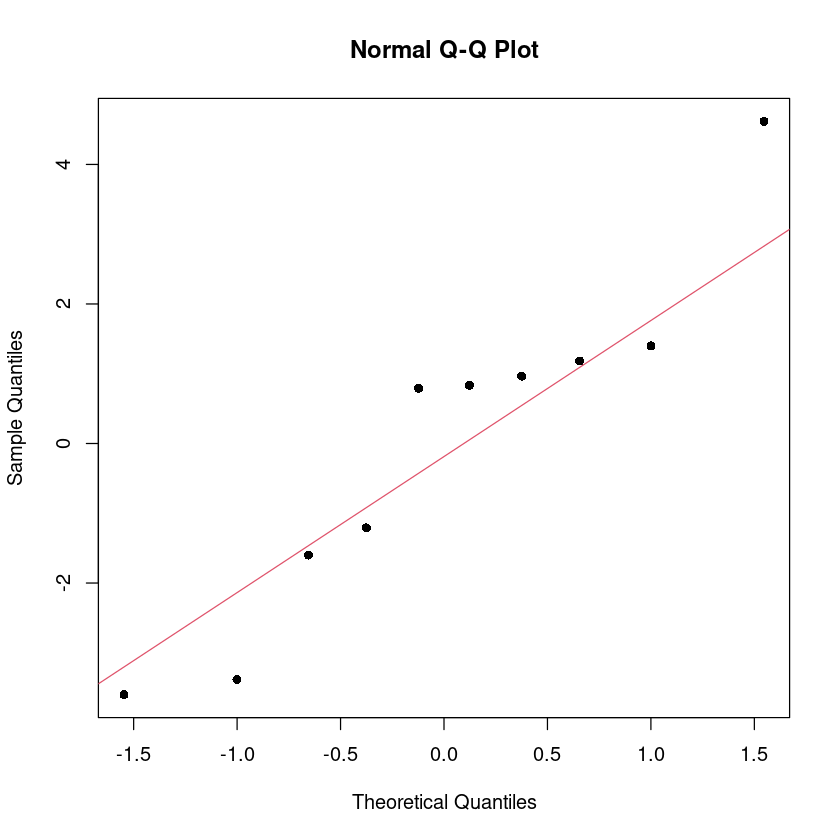

In [44]:
## 정규분포 (QQ plot)
qqnorm(dt$resid, pch=16)
qqline(dt$resid, col = 2)

분위수분위수 그림
- 정규분포의 실제 
- 어떤 분포의 이론적 분위수와 내가 가진 sample의 분위수 비교

주로 꼬리쪽을 많이 본다.
- 이 데이터의 경우 꼬리부분이 차이가 커 보임

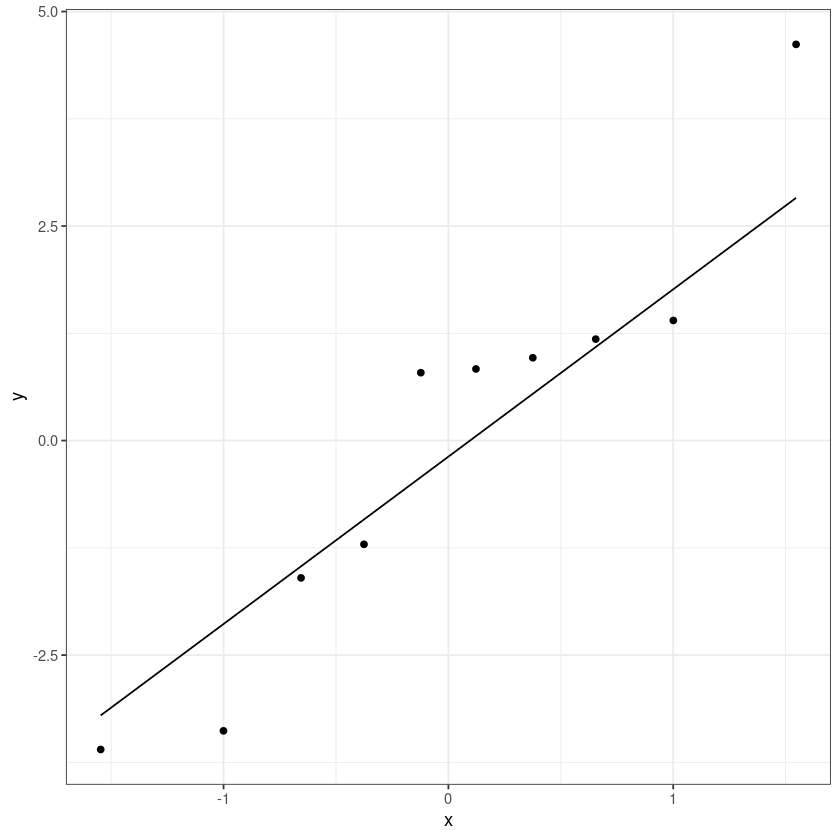

In [45]:
ggplot(dt, aes(sample = resid)) + 
  stat_qq() + stat_qq_line() +
  theme_bw()

In [46]:
## 정규분포 검정 
shapiro.test(dt$resid)  ##shapiro-wilk test
#H0 : normal distributed vs H1 : not


	Shapiro-Wilk normality test

data:  dt$resid
W = 0.92426, p-value = 0.3939


p값 작게 나오면 정규분포라고 하기 어렵다.

- 정규성은 잔차를 넣어줬는데
- bptest는 model을 넣었다.

In [47]:
## 등분산성 검정 
bptest(model1) #Breusch–Pagan test
# H0 : 등분산 vs H1 : 이분산 


	studentized Breusch-Pagan test

data:  model1
BP = 1.6727, df = 1, p-value = 0.1959


### 책 예제

In [59]:
# install.packages('UsingR')
library(UsingR)

Loading required package: MASS

Loading required package: HistData

Loading required package: Hmisc

Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units



Attaching package: ‘UsingR’


The following object is masked from ‘package:survival’:

    cancer




In [60]:
data(father.son)

In [61]:
names(father.son)

[1] "fheight" "sheight"

In [62]:
lm.fit<-lm(sheight~fheight, data=father.son)

In [63]:
summary(lm.fit)


Call:
lm(formula = sheight ~ fheight, data = father.son)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8772 -1.5144 -0.0079  1.6285  8.9685 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.88660    1.83235   18.49   <2e-16 ***
fheight      0.51409    0.02705   19.01   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.437 on 1076 degrees of freedom
Multiple R-squared:  0.2513,	Adjusted R-squared:  0.2506 
F-statistic: 361.2 on 1 and 1076 DF,  p-value: < 2.2e-16


아버지의 키가 아들의 키의 25%만 설명

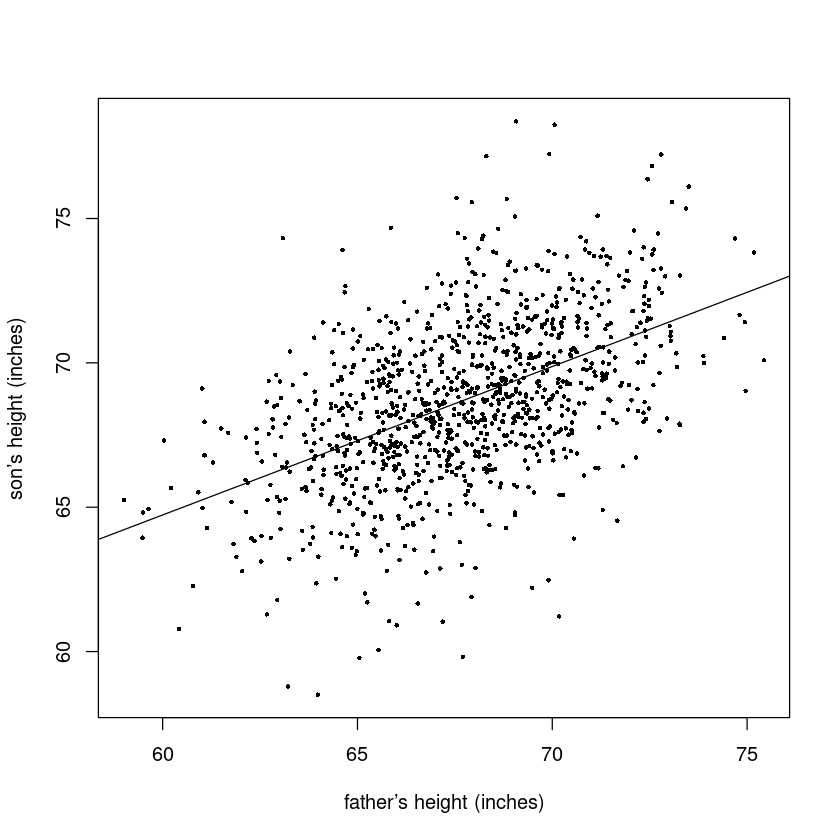

In [64]:
plot(sheight~fheight, 
     data=father.son, 
     pch=16, cex=0.5,
     xlab="father’s height (inches)", 
     ylab="son’s height (inches)")
abline(lm.fit)


Call:
lm(formula = High ~ Year, data = amazon)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3629 -0.5341  0.1479  0.4903  1.1412 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -330.21235   78.03319  -4.232 0.000725 ***
Year           0.18088    0.03961   4.567 0.000371 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8001 on 15 degrees of freedom
Multiple R-squared:  0.5816,	Adjusted R-squared:  0.5537 
F-statistic: 20.85 on 1 and 15 DF,  p-value: 0.0003708


,2.5 %,97.5 %
(Intercept),-496.53615985,-163.8885460
Year,0.09645429,0.2653104


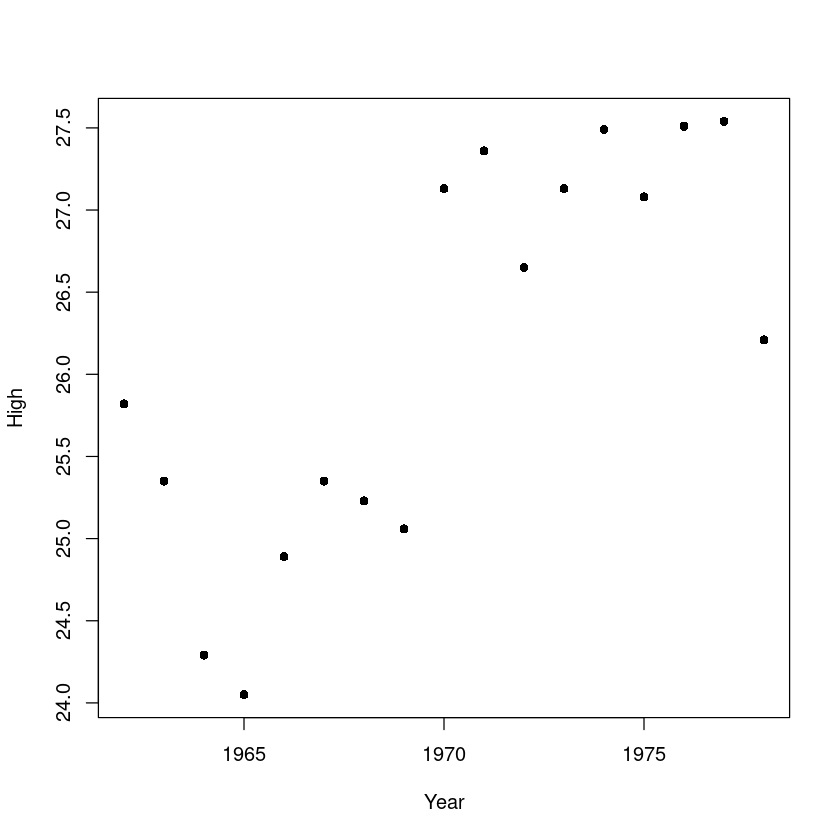


	Durbin-Watson test

data:  lm.fit
DW = 1.0487, p-value = 0.006864
alternative hypothesis: true autocorrelation is greater than 0


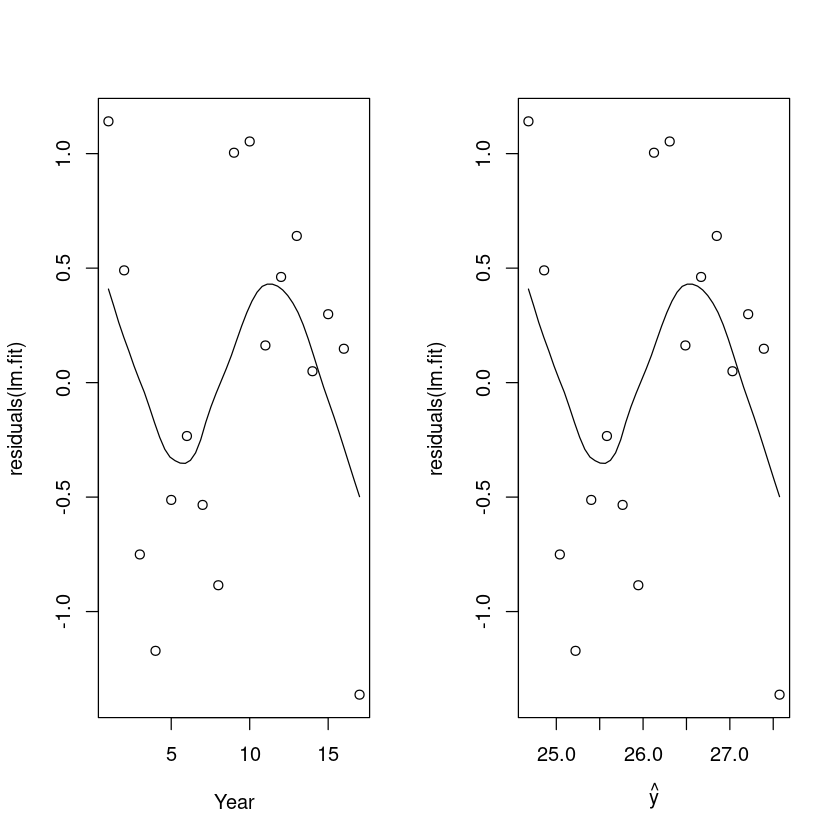

In [65]:

amazon<-read.csv("amazon.csv")
plot(High   ~Year  , amazon, pch=16)

lm.fit<-lm(High~Year, data=amazon)
summary(lm.fit)

confint(lm.fit)

par(mfrow=c(1,2))
scatter.smooth(x=1:length(amazon$Year), y=residuals(lm.fit), xlab="Year")
scatter.smooth(x=predict(lm.fit), y=residuals(lm.fit), xlab=expression(hat(y)))

library(lmtest)
dwtest(lm.fit)


양의 상관관계가 있다.
- 시간순 index
- 최근 관측 데이터에 영향 많이 받는 편